<div align="center">
<font size="6"> SIIM-ISIC Melanoma Classification  </font>  
</div> 


<div align="center">
<font size="4"> Identify melanoma in lesion images  </font>  
</div> 

<img align="right" src="https://raw.githubusercontent.com/kabartay/kaggle-siim-isic-melanoma-classification/master/materials/logo.png" data-canonical-src="https://raw.githubusercontent.com/kabartay/kaggle-siim-isic-melanoma-classification/master/materials/logo.png" width="300" height="400" />

Skin cancer is the most prevalent type of cancer. **Melanoma**, specifically, is responsible for **75%** of skin cancer deaths, despite being the least common skin cancer. The American Cancer Society estimates over 100,000 new melanoma cases will be diagnosed in 2020. It's also expected that almost 7,000 people will die from the disease. As with other cancers, early and accurate detection—potentially aided by data science—can make treatment more effective.

Currently, dermatologists evaluate every one of a patient's moles to identify outlier lesions or “ugly ducklings” that are most likely to be melanoma. Existing AI approaches have not adequately considered this clinical frame of reference. Dermatologists could enhance their diagnostic accuracy if detection algorithms take into account “contextual” images within the same patient to determine which images represent a melanoma. If successful, classifiers would be more accurate and could better support dermatological clinic work.

As the leading healthcare organization for informatics in medical imaging, the [Society for Imaging Informatics in Medicine (SIIM)](https://siim.org/)'s mission is to advance medical imaging informatics through education, research, and innovation in a multi-disciplinary community. SIIM is joined by the [International Skin Imaging Collaboration (ISIC)](https://www.isic-archive.com/), an international effort to improve melanoma diagnosis. The ISIC Archive contains the largest publicly available collection of quality-controlled dermoscopic images of skin lesions.

In this competition, you’ll identify melanoma in images of skin lesions. In particular, you’ll use images within the same patient and determine which are likely to represent a melanoma. Using patient-level contextual information may help the development of image analysis tools, which could better support clinical dermatologists.

Melanoma is a deadly disease, but if caught early, most melanomas can be cured with minor surgery. Image analysis tools that automate the diagnosis of melanoma will improve dermatologists' diagnostic accuracy. Better detection of melanoma has the opportunity to positively impact millions of people.

<img align="left" src="https://raw.githubusercontent.com/kabartay/kaggle-siim-isic-melanoma-classification/master/materials/melanoma.png" data-canonical-src="https://raw.githubusercontent.com/kabartay/kaggle-siim-isic-melanoma-classification/master/materials/melanoma.png" width="1200" height="450" />


In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        #print(os.path.join(dirname, filename)) # otherwise too long
        continue

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import os
import json
from pathlib import Path

import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
data_path = Path('/kaggle/input/siim-isic-melanoma-classification/')
train_path = data_path / 'train'
test_path = data_path / 'test'
print("training_path", train_path)
print("test_path", test_path)

training_path /kaggle/input/siim-isic-melanoma-classification/train
test_path /kaggle/input/siim-isic-melanoma-classification/test


In [4]:
!ls /kaggle/input/siim-isic-melanoma-classification/

jpeg  sample_submission.csv  test  test.csv  tfrecords	train  train.csv


## Images

In [5]:
#!ls /kaggle/input/siim-isic-melanoma-classification/jpeg/train

In [6]:
#!ls /kaggle/input/siim-isic-melanoma-classification/jpeg/test

In [7]:
data_path = Path('/kaggle/input/siim-isic-melanoma-classification/')
im_train_path = data_path / 'jpeg' / 'train'
im_test_path = data_path / 'jpeg' / 'test'
print("train_path: ", im_train_path)
print("test_path:  ", im_test_path)

train_path:  /kaggle/input/siim-isic-melanoma-classification/jpeg/train
test_path:   /kaggle/input/siim-isic-melanoma-classification/jpeg/test


In [8]:
import tensorflow as tf
from tensorflow.python.keras.preprocessing.image import load_img, img_to_array

from keras import models, regularizers, layers, optimizers, losses, metrics
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils, to_categorical
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image

Using TensorFlow backend.


In [9]:
def image_show(im_num,im_folder,im_size):
    """
    MO: Show melanoma images.
    """
    im_ind = 'ISIC'
    im_name = '{}_{}'.format(im_ind,im_num)
    if im_folder=='train':
        im_dir = im_train_path
    elif im_folder=='test':
        im_dir = im_test_path
    im_path = str(im_dir)+'/'+str(im_name)+'.jpg'
    im_path
    
    #from tf.keras.preprocessing.image.load_img
    img = image.load_img(im_path, target_size=(im_size, im_size)) #target_size=(224, 224)
    imgplot = plt.imshow(img)
    print(im_ind,"Image Number:", im_num)
    plt.show()

ISIC Image Number: 5225336


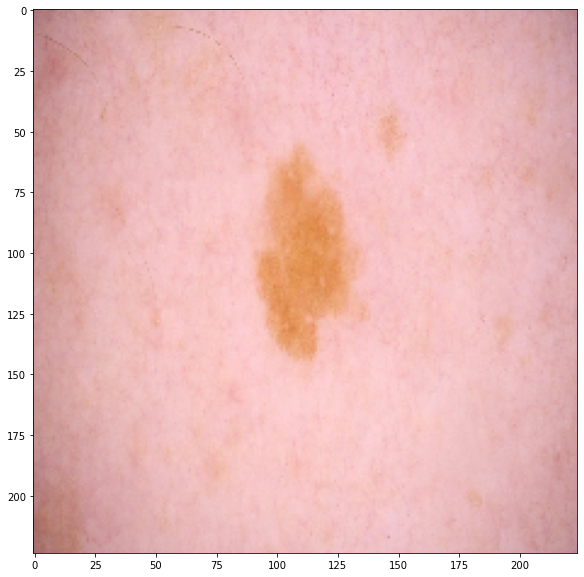

In [10]:
plt.figure(figsize = (10,10))
image_show(5225336,'train',224)

ISIC Image Number: 5224960


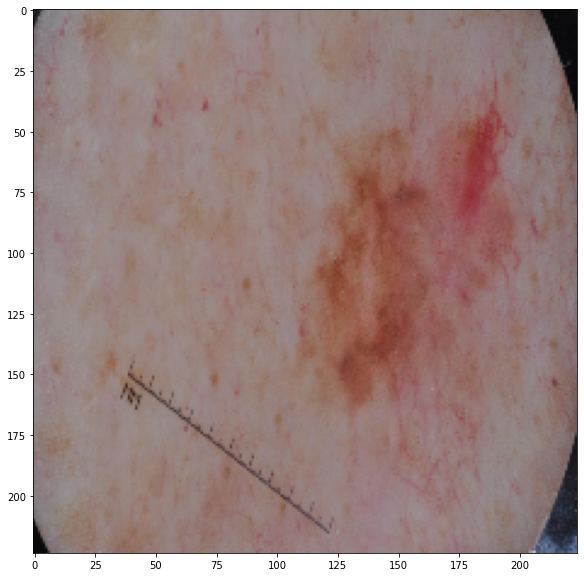

In [11]:
plt.figure(figsize = (10,10))
image_show(5224960,'test',224)

In [12]:
!ls /kaggle/input/siim-isic-melanoma-classification/test/ISIC_5224960.dcm

/kaggle/input/siim-isic-melanoma-classification/test/ISIC_5224960.dcm


In [13]:
#import dicom

import pydicom
from pydicom.data import get_testdata_files

print(__doc__)

PathDicom = '/kaggle/input/siim-isic-melanoma-classification/'
lstFilesDCM = []  # create an empty list
for dirName, subdirList, fileList in os.walk(PathDicom):
    for filename in fileList:
        if ".dcm" in filename.lower():  # check whether the file's DICOM
            lstFilesDCM.append(os.path.join(dirName,filename))

Automatically created module for IPython interactive environment


In [14]:
print(lstFilesDCM[0])

/kaggle/input/siim-isic-melanoma-classification/test/ISIC_8359407.dcm


In [15]:
RefDs = pydicom.dcmread(lstFilesDCM[0])
RefDs

(0008, 0008) Image Type                          CS: ['DERIVED', 'SECONDARY']
(0008, 0014) Instance Creator UID                UI: 1.3.6.1.4.1.5962.99.3
(0008, 0016) SOP Class UID                       UI: "1.2.840.10008.5.1.4.1.1.77.1.4"
(0008, 0018) SOP Instance UID                    UI: 1.3.6.1.4.1.5962.99.1.7162.1857.1589854205491.1.1.0.0.0
(0008, 0020) Study Date                          DA: '20200519'
(0008, 0023) Content Date                        DA: '20200519'
(0008, 0030) Study Time                          TM: '021005'
(0008, 0033) Content Time                        TM: '021005'
(0008, 0050) Accession Number                    SH: ''
(0008, 0060) Modality                            CS: '"XC"'
(0008, 0070) Manufacturer                        LO: ''
(0008, 0080) Institution Name                    LO: 'ISDIS'
(0008, 0090) Referring Physician's Name          PN: ''
(0008, 1030) Study Description                   LO: 'ISIC 2020 Grand Challenge image'
(0008, 2218)  Anatomic R

In [16]:
# Get ref file
RefDs = pydicom.dcmread(lstFilesDCM[0])

# Load dimensions based on the number of rows, columns, and slices (along the Z axis)
ConstPixelDims = (int(RefDs.Rows), int(RefDs.Columns), len(lstFilesDCM))
print(ConstPixelDims)

(4000, 6000, 44108)


In [17]:
pat_name = RefDs.PatientName
display_name = pat_name.family_name + ", " + pat_name.given_name
print("Patient's name...:", display_name)
print("Patient id.......:", RefDs.PatientID)
print("Modality.........:", RefDs.Modality)
print("Study Date.......:", RefDs.StudyDate)

Patient's name...: "ISIC, 8359407"
Patient id.......: "ISIC_8359407"
Modality.........: "XC"
Study Date.......: 20200519


Image size.......: 4000 x 6000, 2419780 bytes
Slice location...: (missing)


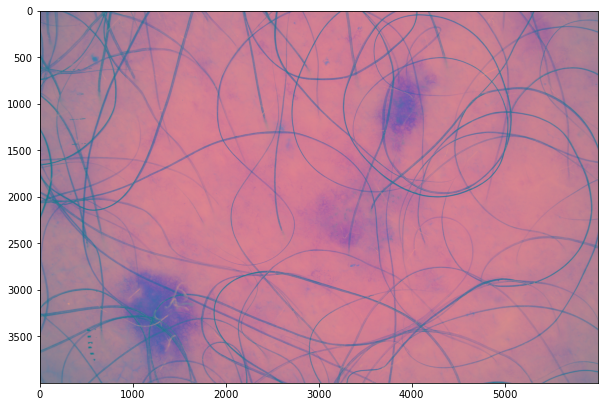

In [18]:
if 'PixelData' in RefDs:
    rows = int(RefDs.Rows)
    cols = int(RefDs.Columns)
    print("Image size.......: {rows:d} x {cols:d}, {size:d} bytes".format(rows=rows, cols=cols, size=len(RefDs.PixelData)))
    if 'PixelSpacing' in RefDs:
        print("Pixel spacing....:", RefDs.PixelSpacing) 

        
# use .get() if not sure the item exists, and want a default value if missing
print("Slice location...:", RefDs.get('SliceLocation', "(missing)"))

# plot the image using matplotlib
plt.figure(figsize = (10,10))
plt.imshow(RefDs.pixel_array, cmap=plt.cm.bone)
plt.show()

## Explore tables

In [19]:
train = pd.read_csv(data_path / 'train.csv')
test  = pd.read_csv(data_path / 'test.csv')
sub   = pd.read_csv(data_path / 'sample_submission.csv')

train.shape, test.shape, sub.shape

((33126, 8), (10982, 5), (10982, 2))

In [20]:
train.isna().sum()

image_name                         0
patient_id                         0
sex                               65
age_approx                        68
anatom_site_general_challenge    527
diagnosis                          0
benign_malignant                   0
target                             0
dtype: int64

In [21]:
train['sex'] = train['sex'].fillna('na')
train['age_approx'] = train['age_approx'].fillna(0)
train['anatom_site_general_challenge'] = train['anatom_site_general_challenge'].fillna('na')

In [22]:
train.isna().sum()

image_name                       0
patient_id                       0
sex                              0
age_approx                       0
anatom_site_general_challenge    0
diagnosis                        0
benign_malignant                 0
target                           0
dtype: int64

In [23]:
train.head(10)

,image_name,patient_id,sex,age_approx,anatom_site_general_challenge,diagnosis,benign_malignant,target
0,ISIC_2637011,IP_7279968,male,45.0,head/neck,unknown,benign,0
1,ISIC_0015719,IP_3075186,female,45.0,upper extremity,unknown,benign,0
2,ISIC_0052212,IP_2842074,female,50.0,lower extremity,nevus,benign,0
3,ISIC_0068279,IP_6890425,female,45.0,head/neck,unknown,benign,0
4,ISIC_0074268,IP_8723313,female,55.0,upper extremity,unknown,benign,0
5,ISIC_0074311,IP_2950485,female,40.0,lower extremity,unknown,benign,0
6,ISIC_0074542,IP_4698288,male,25.0,lower extremity,unknown,benign,0
7,ISIC_0075663,IP_6017204,female,35.0,torso,unknown,benign,0
8,ISIC_0075914,IP_7622888,male,30.0,torso,unknown,benign,0
9,ISIC_0076262,IP_5075533,female,50.0,lower extremity,unknown,benign,0


In [24]:
test.isna().sum()

image_name                         0
patient_id                         0
sex                                0
age_approx                         0
anatom_site_general_challenge    351
dtype: int64

In [25]:
test['anatom_site_general_challenge'] = test['anatom_site_general_challenge'].fillna('na')

In [26]:
test.isna().sum()

image_name                       0
patient_id                       0
sex                              0
age_approx                       0
anatom_site_general_challenge    0
dtype: int64

In [27]:
test.head(10)

,image_name,patient_id,sex,age_approx,anatom_site_general_challenge
0,ISIC_0052060,IP_3579794,male,70.0,na
1,ISIC_0052349,IP_7782715,male,40.0,lower extremity
2,ISIC_0058510,IP_7960270,female,55.0,torso
3,ISIC_0073313,IP_6375035,female,50.0,torso
4,ISIC_0073502,IP_0589375,female,45.0,lower extremity
5,ISIC_0074618,IP_4438996,male,50.0,lower extremity
6,ISIC_0076801,IP_3110660,male,45.0,upper extremity
7,ISIC_0077586,IP_8578442,male,50.0,lower extremity
8,ISIC_0082004,IP_0817448,female,45.0,torso
9,ISIC_0082785,IP_3634181,male,65.0,lower extremity


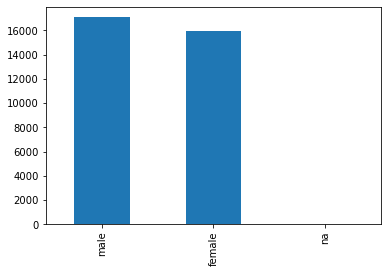

In [28]:
train['sex'].value_counts().plot(kind='bar')

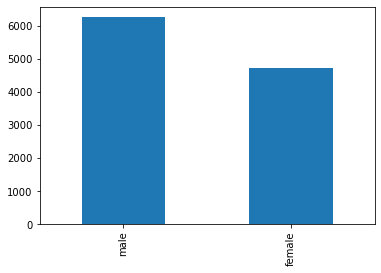

In [29]:
test['sex'].value_counts().plot(kind='bar')

In [30]:
train['sex'].isna().sum()

0

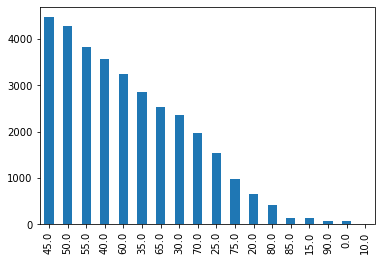

In [31]:
train['age_approx'].value_counts().plot(kind='bar')

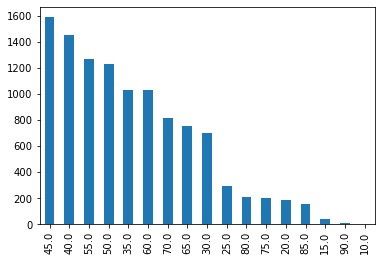

In [32]:
test['age_approx'].value_counts().plot(kind='bar')

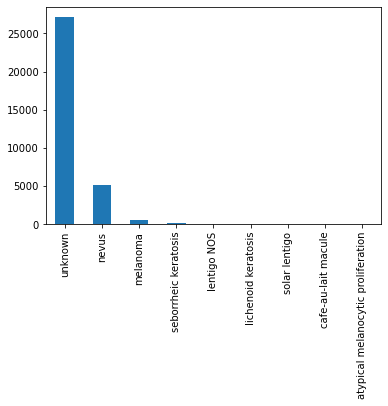

In [33]:
train['diagnosis'].value_counts().plot(kind='bar')

## Melanoma is rare, <2%

In [34]:
train['diagnosis'].value_counts()

unknown                               27124
nevus                                  5193
melanoma                                584
seborrheic keratosis                    135
lentigo NOS                              44
lichenoid keratosis                      37
solar lentigo                             7
cafe-au-lait macule                       1
atypical melanocytic proliferation        1
Name: diagnosis, dtype: int64

In [35]:
print('Diagnosis                             Percent\n-----------------------------------------------')
print((train['diagnosis'].value_counts() / train['diagnosis'].value_counts().sum() ) *100)

Diagnosis                             Percent
-----------------------------------------------
unknown                               81.881302
nevus                                 15.676508
melanoma                               1.762966
seborrheic keratosis                   0.407535
lentigo NOS                            0.132826
lichenoid keratosis                    0.111695
solar lentigo                          0.021131
cafe-au-lait macule                    0.003019
atypical melanocytic proliferation     0.003019
Name: diagnosis, dtype: float64


## In one plot and save

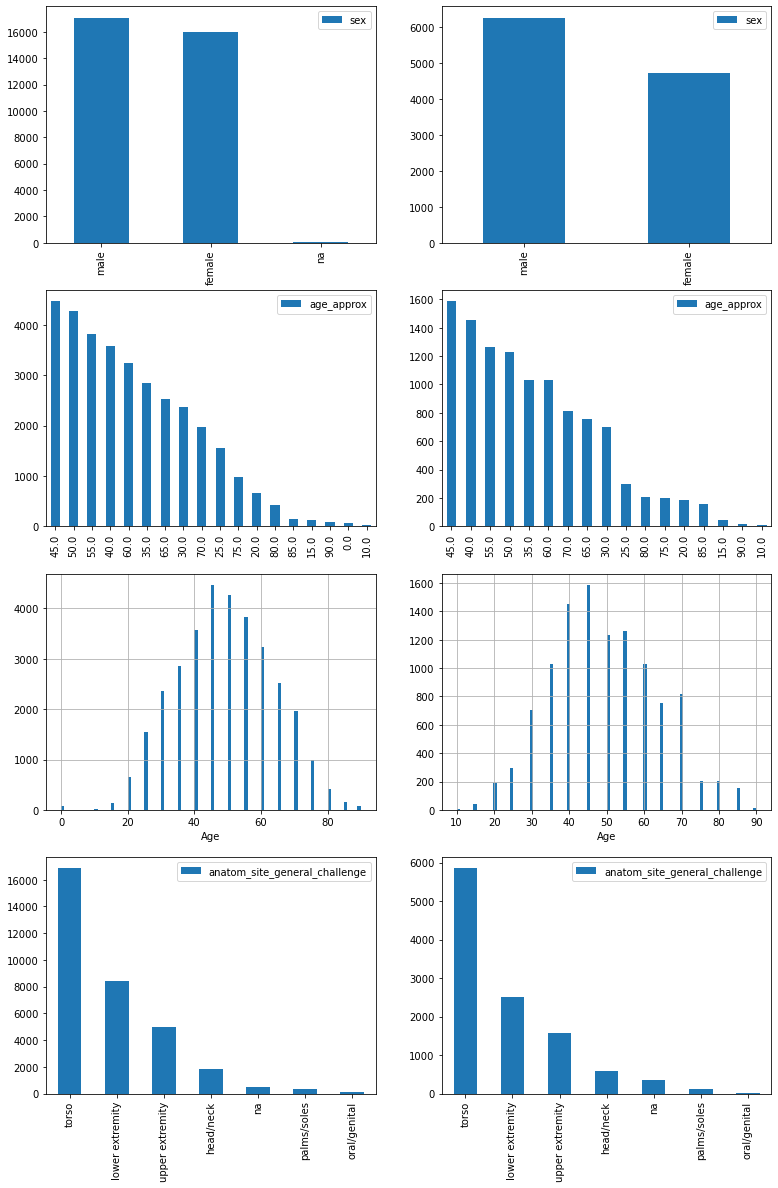

In [36]:
fig, axs = plt.subplots(4,2, figsize=(13,20))

# left train, right test

train['sex'].value_counts().plot(kind='bar', legend=True, ax=axs[0,0])
test['sex'].value_counts().plot(kind='bar', legend=True, ax=axs[0,1])

train['age_approx'].value_counts().plot(kind='bar', legend=True, ax=axs[1,0])
test['age_approx'].value_counts().plot(kind='bar', legend=True, ax=axs[1,1])

train['age_approx'].hist(bins=90, ax=axs[2,0])
test['age_approx'].hist(bins=90, ax=axs[2,1])
axs[2,0].set_xlabel('Age')
axs[2,1].set_xlabel('Age')

train['anatom_site_general_challenge'].value_counts().plot(kind='bar', legend=True, ax=axs[3,0])
test['anatom_site_general_challenge'].value_counts().plot(kind='bar', legend=True, ax=axs[3,1])


plt.savefig('data_sex_age_anatom.png',dpi=100)

plt.show()